In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/ABBREV.csv'
data = pd.read_csv(file_path)

In [ ]:
# Basic overview
print(data.info())
print(data.describe())
print(data.isnull().sum())  # Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              8790 non-null   int64  
 1   NDB_No             8790 non-null   int64  
 2   Shrt_Desc          8790 non-null   object 
 3   Water_(g)          8789 non-null   float64
 4   Energ_Kcal         8790 non-null   int64  
 5   Protein_(g)        8790 non-null   float64
 6   Lipid_Tot_(g)      8790 non-null   float64
 7   Ash_(g)            8465 non-null   float64
 8   Carbohydrt_(g)     8790 non-null   float64
 9   Fiber_TD_(g)       8196 non-null   float64
 10  Sugar_Tot_(g)      6958 non-null   float64
 11  Calcium_(mg)       8442 non-null   float64
 12  Iron_(mg)          8646 non-null   float64
 13  Magnesium_(mg)     8051 non-null   float64
 14  Phosphorus_(mg)    8211 non-null   float64
 15  Potassium_(mg)     8364 non-null   float64
 16  Sodium_(mg)        8707 

In [ ]:
# Count missing values
print(data.isnull().sum())

# Drop columns with many missing values
data = data.dropna(axis=1, thresh=int(0.5 * len(data)))

# Fill remaining missing values with the mean only for numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# For non-numeric columns, you can fill missing values with a placeholder (e.g., 'Unknown')
non_numeric_cols = data.select_dtypes(exclude=['float64', 'int64']).columns
data[non_numeric_cols] = data[non_numeric_cols].fillna('Unknown')

index                   0
NDB_No                  0
Shrt_Desc               0
Water_(g)               1
Energ_Kcal              0
Protein_(g)             0
Lipid_Tot_(g)           0
Ash_(g)               325
Carbohydrt_(g)          0
Fiber_TD_(g)          594
Sugar_Tot_(g)        1832
Calcium_(mg)          348
Iron_(mg)             144
Magnesium_(mg)        739
Phosphorus_(mg)       579
Potassium_(mg)        426
Sodium_(mg)            83
Zinc_(mg)             706
Copper_mg)           1257
Manganese_(mg)       2160
Selenium_(µg)        1700
Vit_C_(mg)            818
Thiamin_(mg)          634
Riboflavin_(mg)       616
Niacin_(mg)           637
Panto_Acid_mg)       2242
Vit_B6_(mg)           905
Folate_Tot_(µg)      1261
Folic_Acid_(µg)      2039
Food_Folate_(µg)     1768
Folate_DFE_(µg)      2057
Choline_Tot_ (mg)    4016
Vit_B12_(µg)         1193
Vit_A_IU              711
Vit_A_RAE            1535
Retinol_(µg)         1806
Alpha_Carot_(µg)     3258
Beta_Carot_(µg)      3162
Beta_Crypt_(

In [ ]:
# Drop duplicate rows, if any
data = data.drop_duplicates()

In [ ]:
# Define columns to keep
columns_to_keep = [
    'NDB_No', 'Shrt_Desc', 'Water_(g)', 'Energ_Kcal', 'Protein_(g)', 'Lipid_Tot_(g)',
    'Carbohydrt_(g)', 'Fiber_TD_(g)', 'Calcium_(mg)', 'Iron_(mg)', 'Sodium_(mg)',
    'Vit_C_(mg)', 'Vit_A_IU', 'Vit_D_µg', 'Vit_K_(µg)', 'FA_Sat_(g)', 'Cholestrl_(mg)'
]

# Retain only the selected columns
data1 = data[columns_to_keep]

# Rename columns for easier access
data1.columns = [
    'ID', 'Food', 'Water', 'Calories', 'Protein', 'Fat', 'Carbs', 'Fiber',
    'Calcium', 'Iron', 'Sodium', 'Vitamin_C', 'Vitamin_A', 'Vitamin_D', 'Vitamin_K',
    'Saturated_Fat', 'Cholesterol'
]


In [ ]:
data1.to_excel('/content/cleaned_dataset.xlsx', index=False)

In [ ]:
# Load the Excel file
file_path = '/content/cleaned_dataset.xlsx'
data = pd.read_excel(file_path)

# Display basic information about the dataset to understand its structure
data.info(), data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8790 non-null   int64  
 1   Food           8790 non-null   object 
 2   Water          8790 non-null   float64
 3   Calories       8790 non-null   int64  
 4   Protein        8790 non-null   float64
 5   Fat            8790 non-null   float64
 6   Carbs          8790 non-null   float64
 7   Fiber          8790 non-null   float64
 8   Calcium        8790 non-null   float64
 9   Iron           8790 non-null   float64
 10  Sodium         8790 non-null   float64
 11  Vitamin_C      8790 non-null   float64
 12  Vitamin_A      8790 non-null   float64
 13  Vitamin_D      8790 non-null   float64
 14  Vitamin_K      8790 non-null   float64
 15  Saturated_Fat  8790 non-null   float64
 16  Cholesterol    8790 non-null   float64
dtypes: float64(14), int64(2), object(1)
memory usage: 1.

(None,
      ID                    Food  Water  Calories  Protein    Fat  Carbs  \
 0  1001        BUTTER,WITH SALT  15.87       717     0.85  81.11   0.06   
 1  1002  BUTTER,WHIPPED,W/ SALT  16.72       718     0.49  78.30   2.87   
 2  1003    BUTTER OIL,ANHYDROUS   0.24       876     0.28  99.48   0.00   
 3  1004             CHEESE,BLUE  42.41       353    21.40  28.74   2.34   
 4  1005            CHEESE,BRICK  41.11       371    23.24  29.68   2.79   
 
    Fiber  Calcium  Iron  Sodium  Vitamin_C  Vitamin_A  Vitamin_D  Vitamin_K  \
 0    0.0     24.0  0.02   643.0        0.0     2499.0        0.0        7.0   
 1    0.0     23.0  0.05   583.0        0.0     2468.0        0.0        4.6   
 2    0.0      4.0  0.00     2.0        0.0     3069.0        0.0        8.6   
 3    0.0    528.0  0.31  1146.0        0.0      721.0        0.5        2.4   
 4    0.0    674.0  0.43   560.0        0.0     1080.0        0.5        2.5   
 
    Saturated_Fat  Cholesterol  
 0         51.368   

In [ ]:
# Step 1: Remove duplicate rows, if any
data = data.drop_duplicates()

# Step 2: Identify columns with low variance and drop them
# Calculate variance for each column (excluding categorical ones like 'Food')
variance = data.drop(columns=['ID', 'Food']).var()
low_variance_columns = variance[variance < 0.01].index

# Drop low variance columns
data = data.drop(columns=low_variance_columns)

# Step 3: If necessary, select the top 1,000 rows based on a significant metric, such as 'Calories'
data = data.sort_values(by='Calories', ascending=False).head(1000)

# Display the cleaned dataset information
data.info(), data.head()

data.to_csv('OR1.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 687 to 1559
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             1000 non-null   int64  
 1   Food           1000 non-null   object 
 2   Water          1000 non-null   float64
 3   Calories       1000 non-null   int64  
 4   Protein        1000 non-null   float64
 5   Fat            1000 non-null   float64
 6   Carbs          1000 non-null   float64
 7   Fiber          1000 non-null   float64
 8   Calcium        1000 non-null   float64
 9   Iron           1000 non-null   float64
 10  Sodium         1000 non-null   float64
 11  Vitamin_C      1000 non-null   float64
 12  Vitamin_A      1000 non-null   float64
 13  Vitamin_D      1000 non-null   float64
 14  Vitamin_K      1000 non-null   float64
 15  Saturated_Fat  1000 non-null   float64
 16  Cholesterol    1000 non-null   float64
dtypes: float64(14), int64(2), object(1)
memory usage: 140.6

In [ ]:
print(data.shape)

(1000, 17)


# **Load Required Libraries and Data**
Ensure all necessary libraries for analysis and visualization are loaded.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew, kurtosis

# **Dataset Overview**

In [ ]:
# Basic data overview
print("Dataset shape:", data.shape)
print("Data types and non-null values:\n", data.info())
print("First few rows of the dataset:\n", data.head())
print("Statistical summary:\n", data.describe(include='all'))

Dataset shape: (1000, 17)
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 687 to 1559
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             1000 non-null   int64  
 1   Food           1000 non-null   object 
 2   Water          1000 non-null   float64
 3   Calories       1000 non-null   int64  
 4   Protein        1000 non-null   float64
 5   Fat            1000 non-null   float64
 6   Carbs          1000 non-null   float64
 7   Fiber          1000 non-null   float64
 8   Calcium        1000 non-null   float64
 9   Iron           1000 non-null   float64
 10  Sodium         1000 non-null   float64
 11  Vitamin_C      1000 non-null   float64
 12  Vitamin_A      1000 non-null   float64
 13  Vitamin_D      1000 non-null   float64
 14  Vitamin_K      1000 non-null   float64
 15  Saturated_Fat  1000 non-null   float64
 16  Cholesterol    1000 non-null   float64
dtypes: float64(14), int64(2), obj

# **Skewness and Kurtosis Analysis**

In [ ]:
# Calculate skewness and kurtosis for numerical columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
skewness = data[numeric_cols].apply(skew).sort_values(ascending=False)
kurtosis_vals = data[numeric_cols].apply(kurtosis).sort_values(ascending=False)
print("Skewness of numeric features:\n", skewness)
print("Kurtosis of numeric features:\n", kurtosis_vals)

Skewness of numeric features:
 Vitamin_D        29.017659
Vitamin_A        26.666002
Cholesterol      12.802345
Sodium            4.596726
Calcium           4.510773
Vitamin_K         3.940687
Saturated_Fat     3.532169
Vitamin_C         3.362346
Iron              3.278694
Fiber             3.233187
Water             2.341521
Protein           2.247845
Calories          1.590079
Fat               1.185315
ID                0.162631
Carbs            -0.483485
dtype: float64
Kurtosis of numeric features:
 Vitamin_D        886.999480
Vitamin_A        780.373148
Cholesterol      193.878197
Sodium            41.276473
Calcium           28.868161
Iron              19.935348
Vitamin_K         19.697938
Fiber             18.054888
Saturated_Fat     15.504072
Vitamin_C         11.583614
Protein            7.520454
Water              4.588224
Calories           1.303056
Fat                0.155768
ID                -0.524116
Carbs             -1.454920
dtype: float64


In [ ]:
# Apply log transformation to reduce skewness for highly skewed features
skewed_cols = ['Vitamin_D', 'Vitamin_C', 'Sodium', 'Vitamin_K', 'Vitamin_A', 'Cholesterol', 'Calcium']
for col in skewed_cols:
    data[col] = np.log1p(data[col])  # log1p handles zero values by computing log(1 + x)

# Recalculate skewness and kurtosis after transformation
skewness = data[numeric_cols].apply(skew).sort_values(ascending=False)
kurtosis_vals = data[numeric_cols].apply(kurtosis).sort_values(ascending=False)
print("Skewness after transformation:\n", skewness)
print("Kurtosis after transformation:\n", kurtosis_vals)

Skewness after transformation:
 Saturated_Fat    3.532169
Iron             3.278694
Fiber            3.233187
Vitamin_D        2.918519
Water            2.341521
Protein          2.247845
Calories         1.590079
Fat              1.185315
Cholesterol      0.944057
Vitamin_C        0.794065
ID               0.162631
Vitamin_A       -0.274456
Carbs           -0.483485
Vitamin_K       -0.665863
Calcium         -0.828457
Sodium          -1.044755
dtype: float64
Kurtosis after transformation:
 Iron             19.935348
Fiber            18.054888
Saturated_Fat    15.504072
Vitamin_D        12.027627
Protein           7.520454
Water             4.588224
Calories          1.303056
Vitamin_K         0.628387
Calcium           0.176500
Fat               0.155768
Sodium           -0.082105
Cholesterol      -0.365376
ID               -0.524116
Vitamin_C        -0.628208
Carbs            -1.454920
Vitamin_A        -1.463892
dtype: float64


Feature Engineering for Macronutrients and Micronutrients
1. Create Ratios for Nutritional Composition
Calculate ratios between macronutrients and total calorie content to understand the caloric distribution in the foods.

In [ ]:
# Create ratios to understand macronutrient contributions
data['Protein_Calorie_Ratio'] = (data['Protein'] * 4) / data['Calories']
data['Carbs_Calorie_Ratio'] = (data['Carbs'] * 4) / data['Calories']
data['Fat_Calorie_Ratio'] = (data['Fat'] * 9) / data['Calories']
data['Fiber_Calorie_Ratio'] = (data['Fiber'] * 2) / data['Calories']
print(f"Protein Calorie Ratio: {data['Protein_Calorie_Ratio']}")
print(f"Carbs Calorie Ratio: {data['Carbs_Calorie_Ratio']}")
print(f"Fat Calorie Ratio: {data['Fat_Calorie_Ratio']}")
print(f"Fiber Calorie Ratio: {data['Fiber_Calorie_Ratio']}")

Protein Calorie Ratio: 687     0.000000
729     0.000000
728     0.000000
727     0.000000
726     0.000000
          ...   
8055    0.082192
5920    0.049315
6062    0.066667
8018    0.043836
1559    0.070137
Name: Protein_Calorie_Ratio, Length: 1000, dtype: float64
Carbs Calorie Ratio: 687     0.000000
729     0.000000
728     0.000000
727     0.000000
726     0.000000
          ...   
8055    0.609132
5920    0.588128
6062    0.658447
8018    0.713242
1559    0.552694
Name: Carbs_Calorie_Ratio, Length: 1000, dtype: float64
Fat Calorie Ratio: 687     0.997783
729     0.997783
728     0.997783
727     0.997783
726     0.997783
          ...   
8055    0.312329
5920    0.378082
6062    0.334932
8018    0.244521
1559    0.376644
Name: Fat_Calorie_Ratio, Length: 1000, dtype: float64
Fiber Calorie Ratio: 687     0.000000
729     0.000000
728     0.000000
727     0.000000
726     0.000000
          ...   
8055    0.016895
5920    0.006849
6062    0.020091
8018    0.005023
1559    0.004566


2. Nutrient Density Feature
This feature can help identify foods that provide high nutrient content per calorie, which is beneficial for nutrient-dense diets.

In [ ]:
# Nutrient density as an index of nutrient-to-calorie ratio
data['Nutrient_Density'] = (data[['Protein', 'Fiber', 'Calcium', 'Iron', 'Vitamin_C', 'Vitamin_A']].sum(axis=1)) / data['Calories']
print(f"Nutrient Density: {data['Nutrient_Density']}")

Nutrient Density: 687     0.000000
729     0.000000
728     0.000000
727     0.000000
726     0.000000
          ...   
8055    0.068289
5920    0.047659
6062    0.052427
8018    0.049729
1559    0.046708
Name: Nutrient_Density, Length: 1000, dtype: float64


Exploratory Data Analysis (EDA)
1. Macronutrient Composition Analysis
Examine macronutrient distributions and the relationships between protein, fat, and carbs.

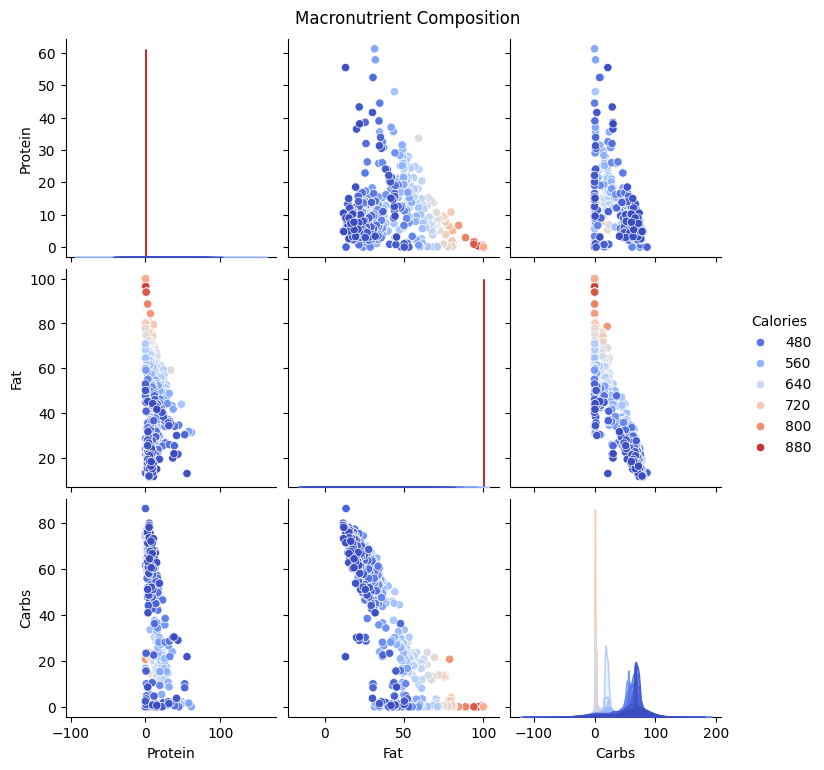

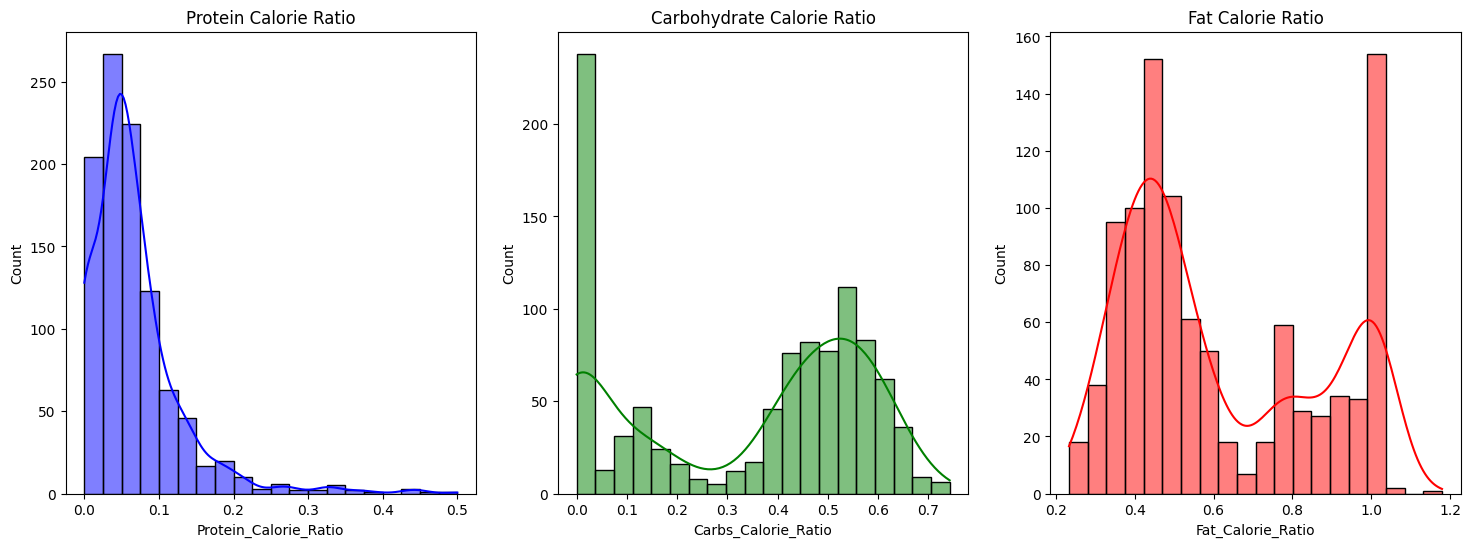

In [ ]:
# Pairplot for macronutrients with color based on calories
sns.pairplot(data, vars=['Protein', 'Fat', 'Carbs'], hue='Calories', palette='coolwarm')
plt.suptitle("Macronutrient Composition", y=1.02)
plt.show()

# Macronutrient calorie distribution
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(data['Protein_Calorie_Ratio'], bins=20, color='blue', kde=True, ax=ax[0])
sns.histplot(data['Carbs_Calorie_Ratio'], bins=20, color='green', kde=True, ax=ax[1])
sns.histplot(data['Fat_Calorie_Ratio'], bins=20, color='red', kde=True, ax=ax[2])
ax[0].set_title('Protein Calorie Ratio')
ax[1].set_title('Carbohydrate Calorie Ratio')
ax[2].set_title('Fat Calorie Ratio')
plt.show()

2. Micronutrient Distribution Analysis
Analyze the distributions of key vitamins and minerals, considering both individual distributions and cumulative nutrient density.

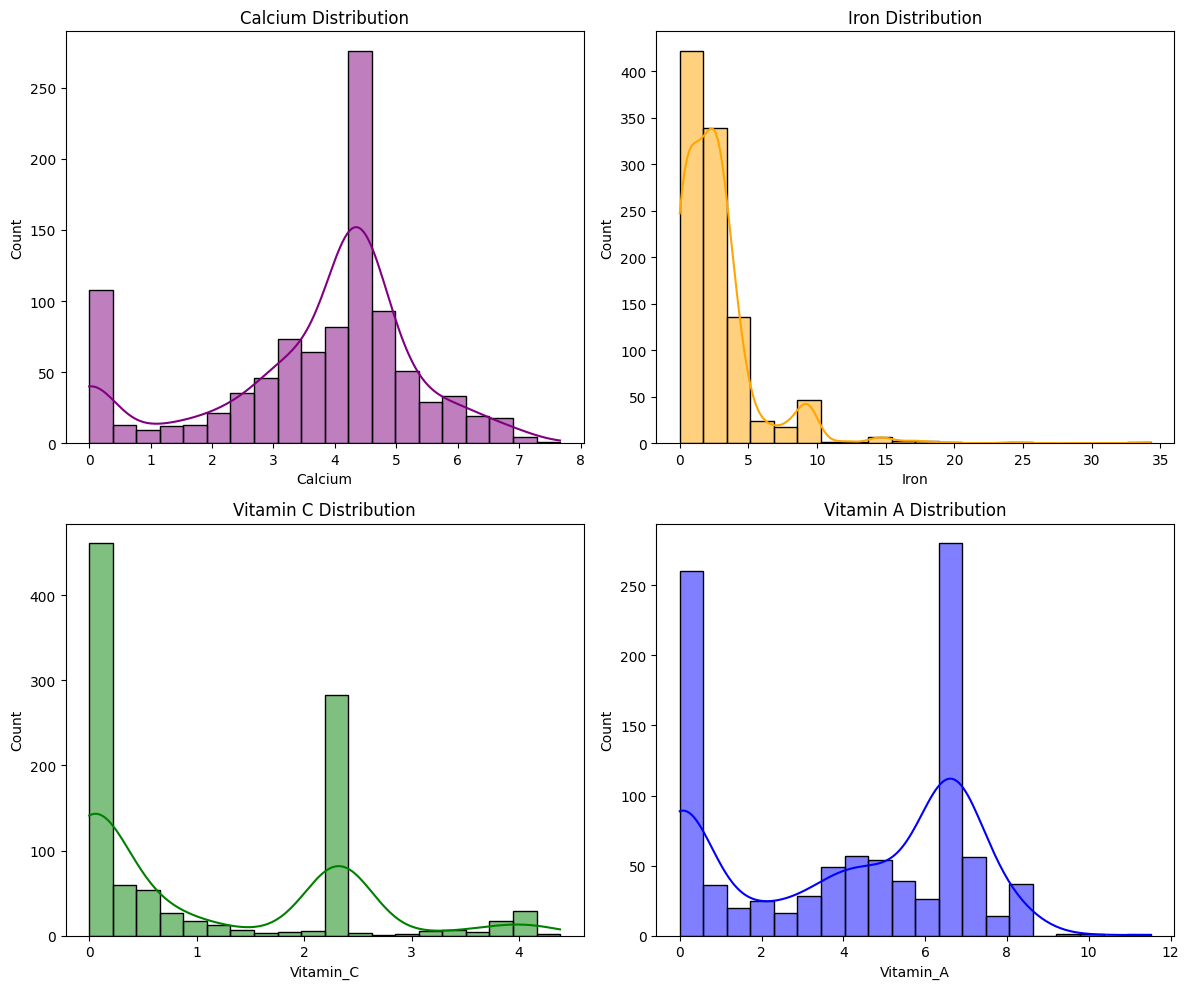

In [ ]:
# Plot vitamin and mineral distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(data['Calcium'], bins=20, color='purple', kde=True, ax=axes[0, 0])
sns.histplot(data['Iron'], bins=20, color='orange', kde=True, ax=axes[0, 1])
sns.histplot(data['Vitamin_C'], bins=20, color='green', kde=True, ax=axes[1, 0])
sns.histplot(data['Vitamin_A'], bins=20, color='blue', kde=True, ax=axes[1, 1])
axes[0, 0].set_title('Calcium Distribution')
axes[0, 1].set_title('Iron Distribution')
axes[1, 0].set_title('Vitamin C Distribution')
axes[1, 1].set_title('Vitamin A Distribution')
plt.tight_layout()
plt.show()

Analysis of High-Calorie and Low-Calorie Foods
Identify foods with extreme caloric content and investigate their macronutrient distribution.

In [ ]:
# High-calorie foods
high_calorie_foods = data[['Food', 'Calories', 'Protein', 'Fat', 'Carbs']].sort_values(by='Calories', ascending=False).head(10)
print("Top 10 High-Calorie Foods:\n", high_calorie_foods)

# Low-calorie foods
low_calorie_foods = data[['Food', 'Calories', 'Protein', 'Fat', 'Carbs']].sort_values(by='Calories').head(10)
print("Top 10 Low-Calorie Foods:\n", low_calorie_foods)

Top 10 High-Calorie Foods:
                               Food  Calories  Protein    Fat  Carbs
687              FAT,MUTTON TALLOW       902      0.0  100.0    0.0
728                FISH OIL,SALMON       902      0.0  100.0    0.0
727   FISH OIL,MENHADEN,FULLY HYDR       902      0.0  100.0    0.0
726              FISH OIL,MENHADEN       902      0.0  100.0    0.0
725               FISH OIL,HERRING       902      0.0  100.0    0.0
724             FISH OIL,COD LIVER       902      0.0  100.0    0.0
633                FAT,BEEF TALLOW       902      0.0  100.0    0.0
634                           LARD       902      0.0  100.0    0.0
729               FISH OIL,SARDINE       902      0.0  100.0    0.0
8352    OIL,WALRUS (ALASKA NATIVE)       900      0.0  100.0    0.0
Top 10 Low-Calorie Foods:
                                                    Food  Calories  Protein  \
1559                              SAUCE,CHS SAU MIX,DRY       438     7.68   
1748       PORK SAUSAGE,LINK/PATTY,FULLY 

5. Sodium Content and Health Impact Analysis
Analyze sodium levels and their distribution across food items, and identify foods with high and low sodium content.

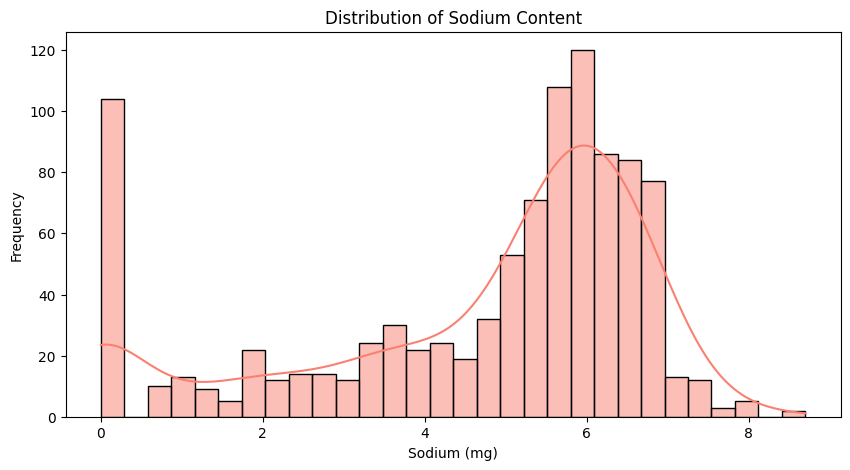

High Sodium Foods:
                                                    Food    Sodium
3718  SEEDS,SUNFLOWER SD KRNLS FROM SHELL,DRY RSTD,W...  8.701014
1269                            SOUP,CRM OF VEG,DRY,PDR  8.508758
1559                              SAUCE,CHS SAU MIX,DRY  8.071843
2615                           PORK,CURED,SALT PORK,RAW  7.895436
6358                         PORK SKINS,BARBECUE-FLAVOR  7.889084
1583                              SAUCE,ALFREDO MIX,DRY  7.859799
3736               PUMPKIN&SQUASH SEEDS,WHL,RSTD,W/SALT  7.840706
3805                       BEEF,CURED,BRKFST STRIPS,CKD  7.720462
2690                           PORK,CURED,BACON,CKD,BKD  7.693482
1603                 SOUP,RAMEN NOODLE,CHICK FLAVOR,DRY  7.562162
Low Sodium Foods:
                                                   Food  Sodium
687                                  FAT,MUTTON TALLOW     0.0
676                                   OIL,COCOA BUTTER     0.0
814                   OIL,INDUSTRIAL,CTTNSD,FU

In [ ]:
# Distribution of sodium levels
plt.figure(figsize=(10, 5))
sns.histplot(data['Sodium'], bins=30, color='salmon', kde=True)
plt.title('Distribution of Sodium Content')
plt.xlabel('Sodium (mg)')
plt.ylabel('Frequency')
plt.show()

# Identify top and bottom sodium foods
high_sodium_foods = data[['Food', 'Sodium']].sort_values(by='Sodium', ascending=False).head(10)
low_sodium_foods = data[['Food', 'Sodium']].sort_values(by='Sodium').head(10)
print("High Sodium Foods:\n", high_sodium_foods)
print("Low Sodium Foods:\n", low_sodium_foods)

Boxplots to Detect Remaining Outliers
Use boxplots to visualize the range and detect any remaining outliers in key nutrients.

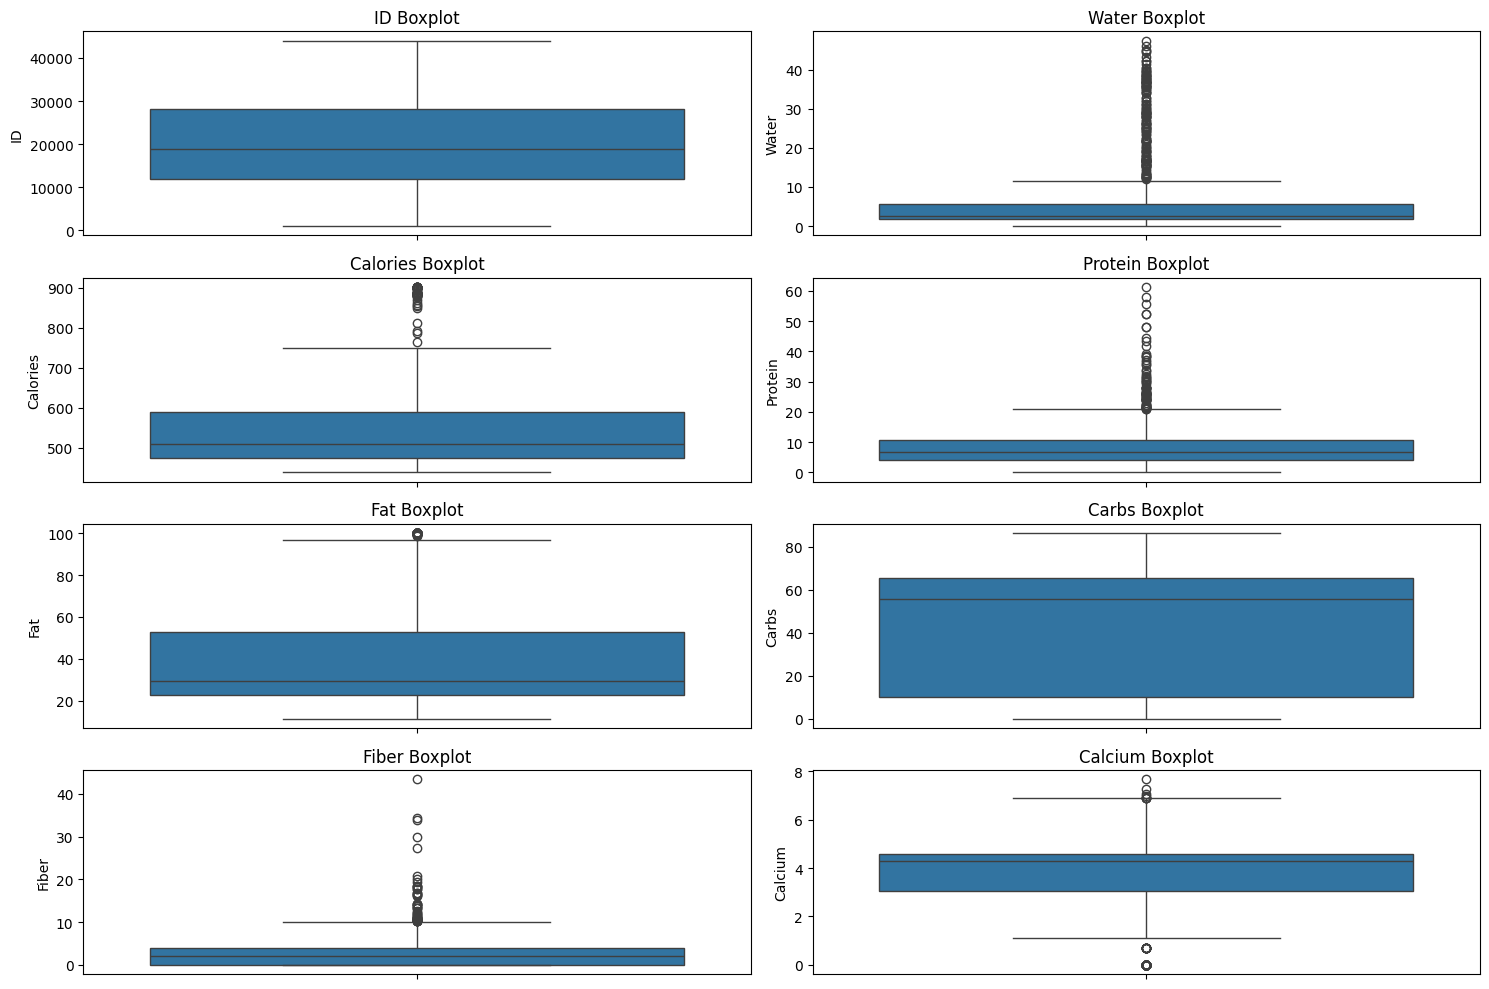

In [ ]:
# Boxplots for nutrient columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols[:8], 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data[col])
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()

C. Correlation Heatmap
A heatmap can help visualize correlations between nutrients and identify if any nutrients are highly correlated, which is useful for optimization problems.

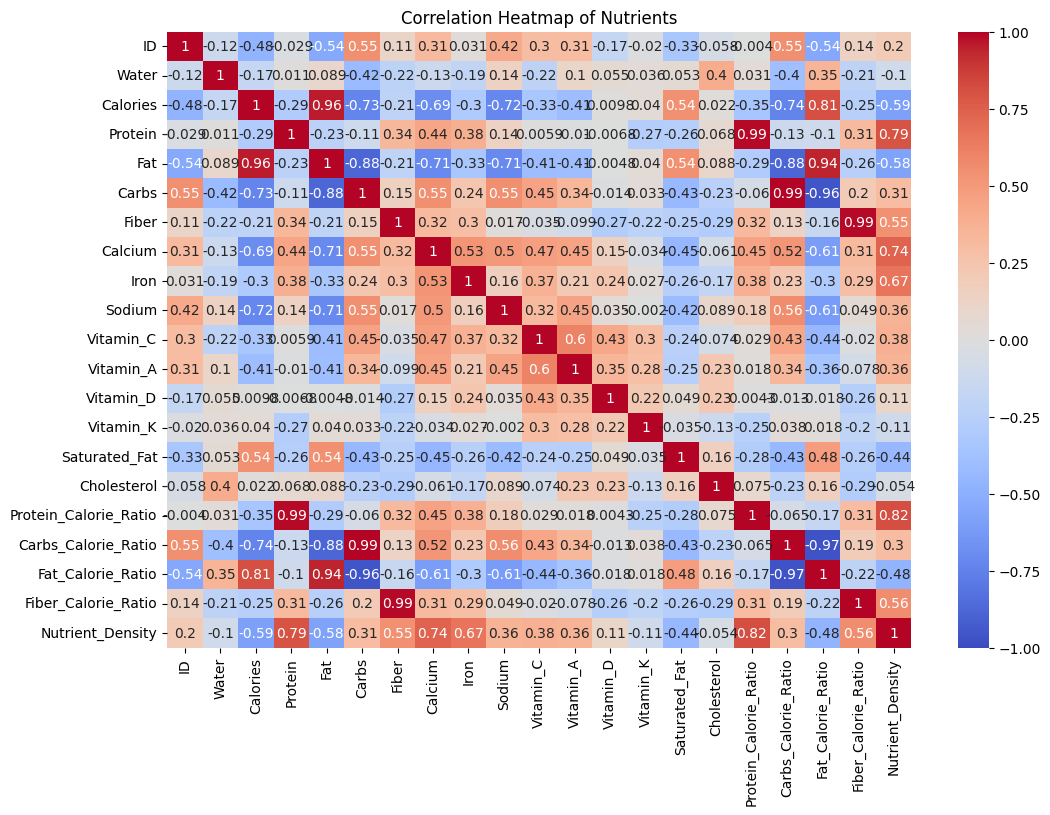

In [ ]:
# Select only numeric columns from the data
numeric_data = data.select_dtypes(include=['number'])

# Compute correlation matrix
corr = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Nutrients')
plt.show()

# **Managerial Statistics**

1. Descriptive Analysis
Objective: Summarize nutritional information to understand the basic statistics of the dataset.

Descriptive Statistics - Macronutrients:
           Calories     Protein          Fat        Carbs
count  1000.000000  1000.00000  1000.000000  1000.000000
mean    561.728000     8.54593    41.327210    41.681410
std     133.236947     8.26707    26.458726    28.089529
min     438.000000     0.00000    11.480000     0.000000
25%     474.000000     4.00000    22.537500    10.045000
50%     509.500000     6.68000    29.310000    55.455000
75%     589.000000    10.80000    52.632500    65.600000
max     902.000000    61.30000   100.000000    86.280000

Descriptive Statistics - Micronutrients:
          Vitamin_A    Vitamin_C      Calcium         Iron
count  1000.000000  1000.000000  1000.000000  1000.000000
mean      4.003353     1.059273     3.664508     2.692808
std       2.922213     1.240511     1.706664     2.942176
min       0.000000     0.000000     0.000000     0.000000
25%       0.000000     0.000000     3.044522     0.890000
50%       4.762174     0.405465     4.290459     2.235

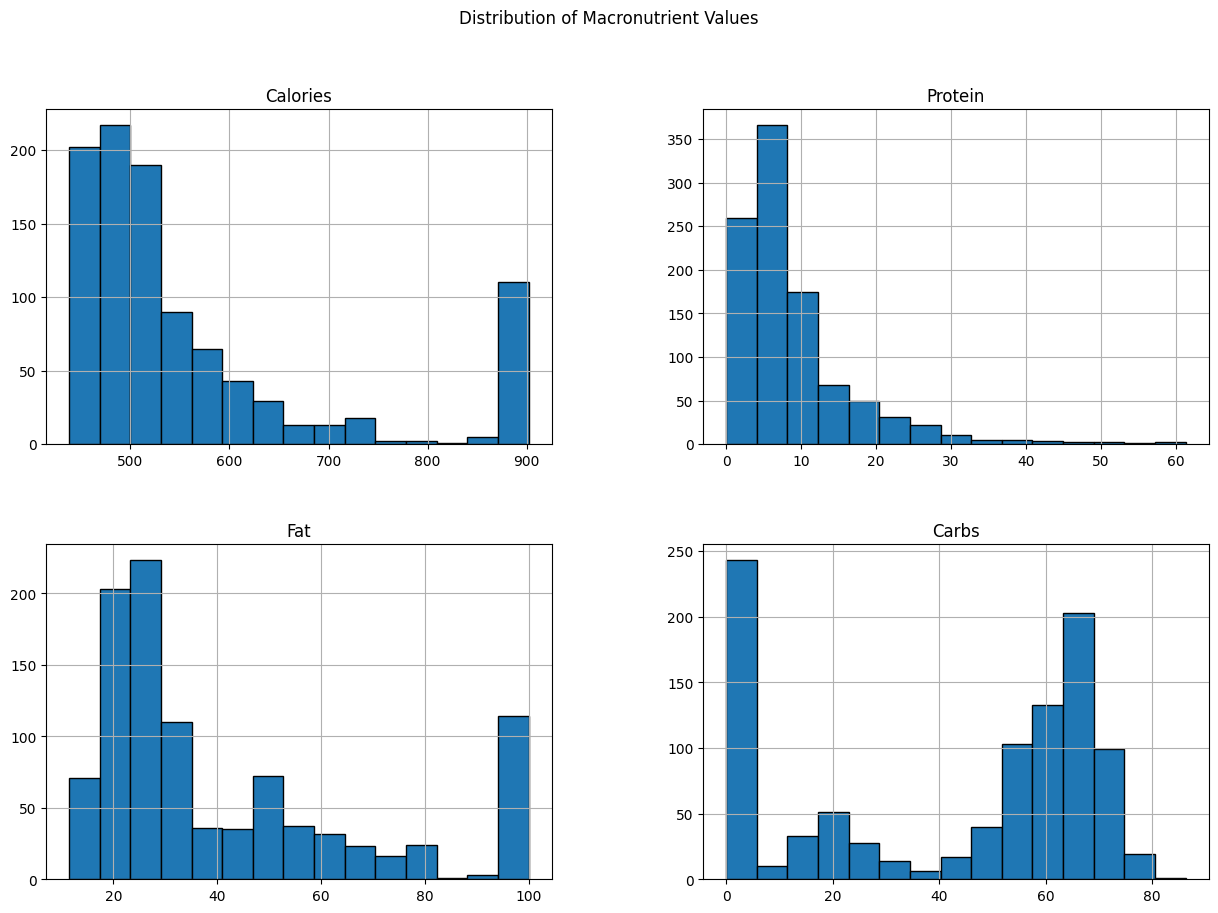

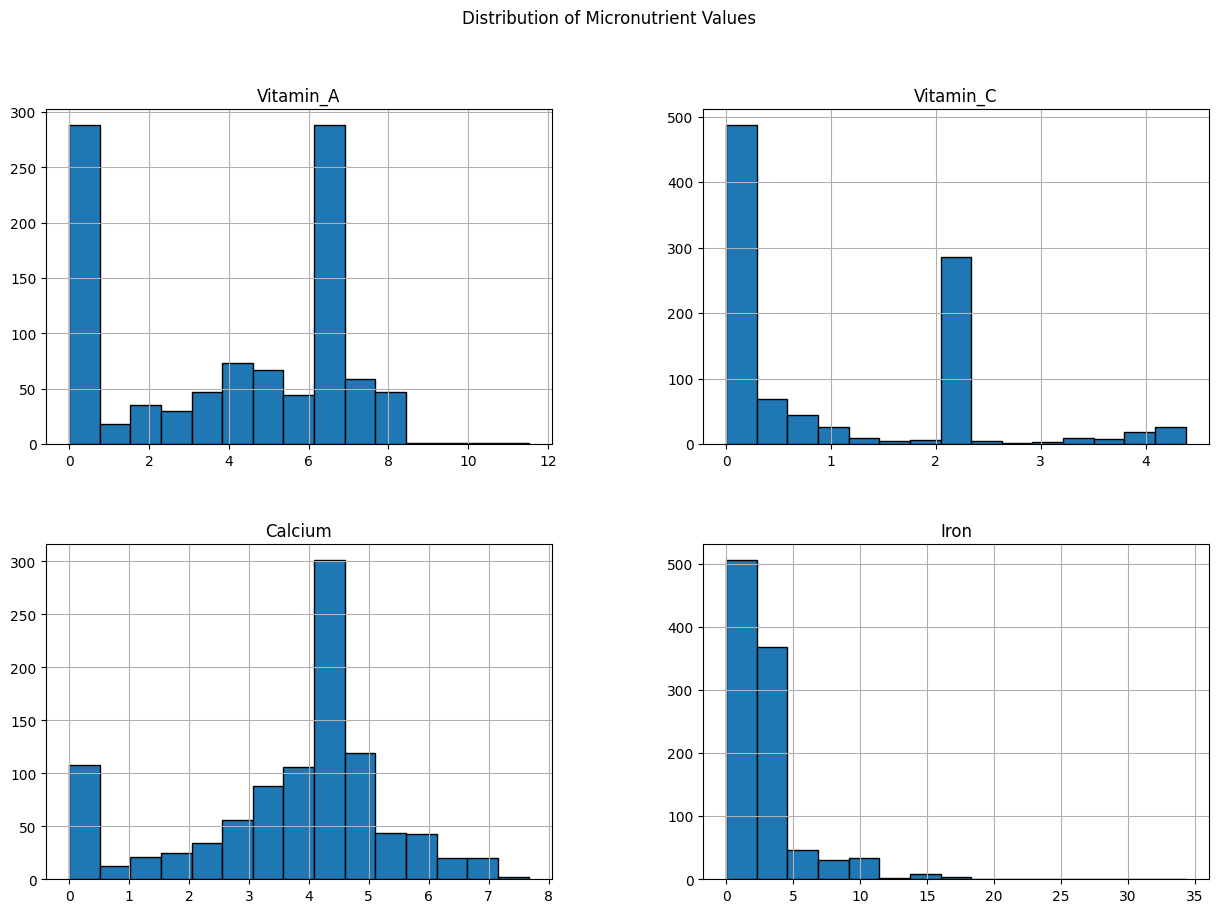

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Separate columns for macro and micro-nutrients
macro_columns = ['Calories', 'Protein', 'Fat', 'Carbs']
micro_columns = ['Vitamin_A', 'Vitamin_C', 'Calcium', 'Iron']  # Example micro-nutrient columns

# Descriptive Statistics for Macronutrients
print("Descriptive Statistics - Macronutrients:\n", data[macro_columns].describe())

# Descriptive Statistics for Micronutrients
print("\nDescriptive Statistics - Micronutrients:\n", data[micro_columns].describe())

# Plot histograms for macronutrients
data[macro_columns].hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribution of Macronutrient Values')
plt.show()

# Plot histograms for micronutrients
data[micro_columns].hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribution of Micronutrient Values')
plt.show()

2. Clustering and Segmentation Analysis
Objective: Group food items into clusters based on nutrient similarity.


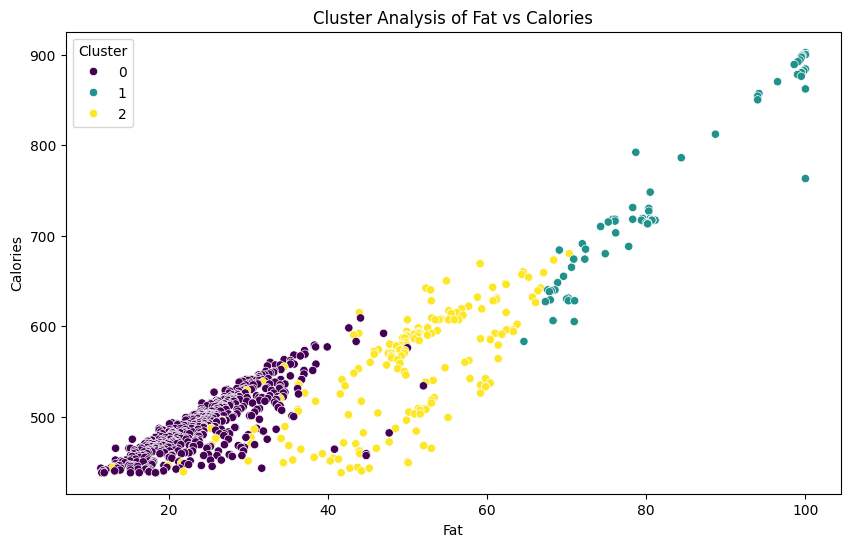

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['Protein', 'Fat', 'Carbs', 'Calories']])

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=3)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Fat'], y=data['Calories'], hue=data['Cluster'], palette='viridis')
plt.title('Cluster Analysis of Fat vs Calories')
plt.xlabel('Fat')
plt.ylabel('Calories')
plt.show()

3. Regression Analysis
Objective: Understand how nutrients influence each other.


In [ ]:
import statsmodels.api as sm

# Define independent and dependent variables
X = data[['Protein', 'Fat', 'Carbs']]
y = data['Calories']

# Add a constant to the model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print("\nRegression Analysis Summary:\n", model.summary())


Regression Analysis Summary:
                             OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 2.656e+04
Date:                Fri, 15 Nov 2024   Prob (F-statistic):               0.00
Time:                        08:28:51   Log-Likelihood:                -4113.3
No. Observations:                1000   AIC:                             8235.
Df Residuals:                     996   BIC:                             8254.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.5396

4. Analysis of Variance (ANOVA) and Post-hoc Tests
Objective: Check if the mean of nutrients differs significantly between groups.


In [ ]:
from scipy import stats
# Perform ANOVA for Macronutrients
anova_macro = stats.f_oneway(data['Protein'], data['Fat'], data['Carbs'])
print("\nANOVA Result:\nF-Statistic =", anova_macro.statistic, "P-Value =", anova_macro.pvalue)

# Perform ANOVA for Micronutrients
anova_micro = stats.f_oneway(data['Vitamin_A'], data['Vitamin_C'], data['Calcium'], data['Iron'])
print("\nANOVA Result - Micronutrients:\nF-Statistic =", anova_micro.statistic, "P-Value =", anova_micro.pvalue)



ANOVA Result:
F-Statistic = 697.5265107312348 P-Value = 1.8955016281190172e-249

ANOVA Result - Micronutrients:
F-Statistic = 321.823522974392 P-Value = 3.6807600814873304e-187


5. Data Visualization
Objective: Use scatter plots and bar charts for further insights.

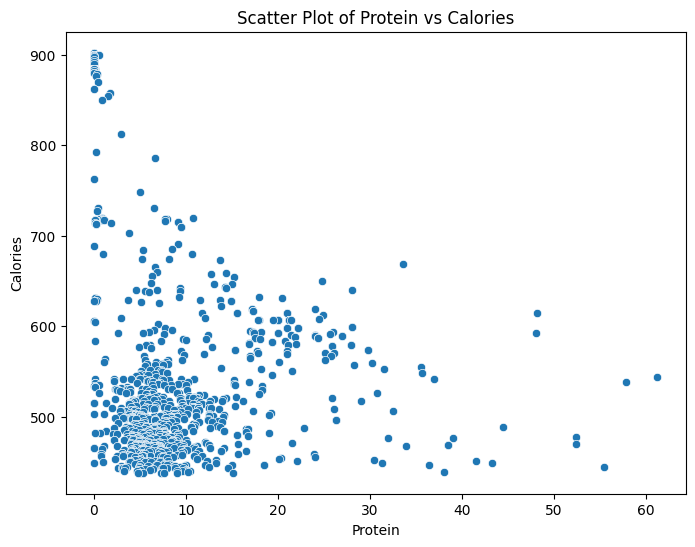

In [ ]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Protein'], y=data['Calories'])
plt.title('Scatter Plot of Protein vs Calories')
plt.xlabel('Protein')
plt.ylabel('Calories')
plt.show()

6. Correlation Analysis
Objective: Analyze relationships within macro and micro-nutrient components.



Macronutrient Correlation Matrix:
           Calories   Protein       Fat     Carbs
Calories  1.000000 -0.289337  0.957328 -0.734373
Protein  -0.289337  1.000000 -0.230831 -0.112416
Fat       0.957328 -0.230831  1.000000 -0.882426
Carbs    -0.734373 -0.112416 -0.882426  1.000000


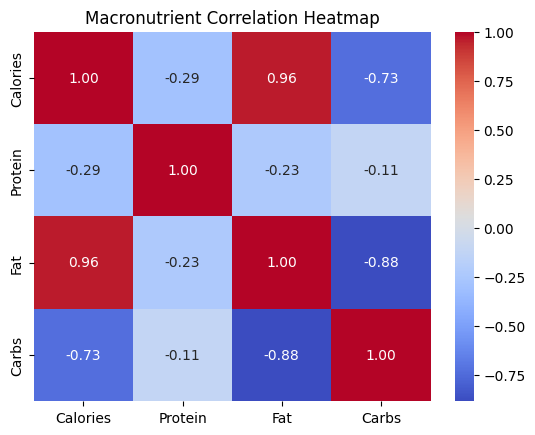


Micronutrient Correlation Matrix:
            Vitamin_A  Vitamin_C   Calcium      Iron
Vitamin_A   1.000000   0.603650  0.453796  0.214837
Vitamin_C   0.603650   1.000000  0.469762  0.370979
Calcium     0.453796   0.469762  1.000000  0.530722
Iron        0.214837   0.370979  0.530722  1.000000


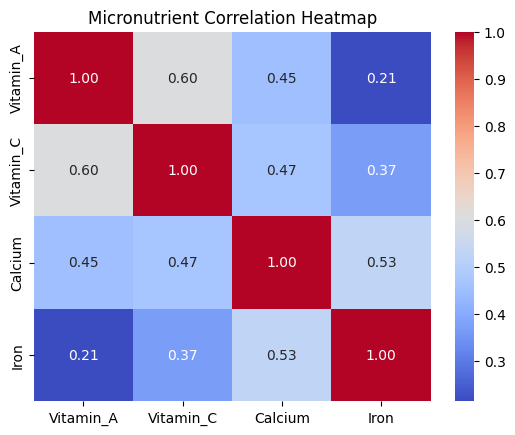

In [ ]:
import seaborn as sns

# Correlation Matrix for Macronutrients
macro_corr = data[macro_columns].corr()
print("\nMacronutrient Correlation Matrix:\n", macro_corr)
sns.heatmap(macro_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macronutrient Correlation Heatmap')
plt.show()

# Correlation Matrix for Micronutrients
micro_corr = data[micro_columns].corr()
print("\nMicronutrient Correlation Matrix:\n", micro_corr)
sns.heatmap(micro_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Micronutrient Correlation Heatmap')
plt.show()

7. Regression Analysis
Objective: Investigate relationships between macro and micro-nutrients.

In [ ]:
import statsmodels.api as sm

# Regression Analysis: Predict Calories using Macronutrients
X_macro = data[['Protein', 'Fat', 'Carbs']]
y_macro = data['Calories']
X_macro = sm.add_constant(X_macro)
model_macro = sm.OLS(y_macro, X_macro).fit()
print("\nRegression Analysis - Macronutrients:\n", model_macro.summary())

# Regression Analysis: Predict Iron using Micronutrients
X_micro = data[['Vitamin_A', 'Vitamin_C', 'Calcium']]
y_micro = data['Iron']
X_micro = sm.add_constant(X_micro)
model_micro = sm.OLS(y_micro, X_micro).fit()
print("\nRegression Analysis - Micronutrients:\n", model_micro.summary())


Regression Analysis - Macronutrients:
                             OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 2.656e+04
Date:                Fri, 15 Nov 2024   Prob (F-statistic):               0.00
Time:                        08:28:54   Log-Likelihood:                -4113.3
No. Observations:                1000   AIC:                             8235.
Df Residuals:                     996   BIC:                             8254.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

# **Operational Research**

In [ ]:
!pip install ortools

**1.Linear Optimization Using OR:** Max intake of Vitamins C, D, Protein and the constraint is calorie limit shouldn't exceed 1500.

In [ ]:
from ortools.linear_solver import pywraplp
import pandas as pd

# Define the solver
solver = pywraplp.Solver.CreateSolver('SCIP')

if not solver:
    print('Solver not created!')
    exit()

# Nutrient columns of interest
nutrients = ['Vitamin_D', 'Vitamin_C', 'Protein']  # Adjust based on your dataset
calories_column = 'Calories'

# Define decision variables: binary (1 if the food is selected, 0 if not)
foods = data['Food'].tolist()
food_vars = {}

for food in foods:
    food_vars[food] = solver.BoolVar(food)

# Objective: Maximize the sum of Vitamin D, Vitamin C, and Protein
objective = solver.Objective()

# Iterate using data.iterrows() to access both the index and the row data
for index, row in data.iterrows():
    food = row['Food']  # Get the food name from the row
    for nutrient in nutrients:
        objective.SetCoefficient(food_vars[food], row[nutrient])

objective.SetMaximization()  # Maximizing the objective

# Constraints: Total calories should not exceed 1500
calorie_limit = 1500
calories_constraint = solver.Constraint(0, calorie_limit)

# Iterate using data.iterrows() to access both the index and the row data
for index, row in data.iterrows():
    food = row['Food']
    calorie_value = float(row[calories_column])
    calories_constraint.SetCoefficient(food_vars[food], calorie_value)

# Solve the problem
status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print('Solution found:')
    for food in foods:
        if food_vars[food].solution_value() == 1:
            print(f"Selected: {food}")
    print("Max Nutrient Intake: ", objective.Value())
else:
    print('No optimal solution found.')

Solution found:
Selected: PORK SKINS,PLAIN
Selected: TOFU,DRIED-FROZEN (KOYADOFU)
Selected: EGG SUBSTITUTE,POWDER
Max Nutrient Intake:  169.27


2.Max the weighted sum  Vitamins D,C,Calcium  with constraints of calories less than 1500 and protein less than 50

In [ ]:
from scipy.optimize import linprog
import pandas as pd

# Check the sum of calories and protein in the dataset
calories = data['Calories'].values
protein = data['Protein'].values

print("Total Calories in Dataset:", sum(calories))
print("Total Protein in Dataset:", sum(protein))

# Check for extreme values in nutrients (to help identify unreasonably high values)
print("Max Vitamin D:", data['Vitamin_D'].max())
print("Max Vitamin C:", data['Vitamin_C'].max())
print("Max Calcium:", data['Calcium'].max())

# Define the objective coefficients (maximize Vitamin D, Vitamin C, Calcium)
# In linprog, we minimize, so we use negative values for maximization
nutrients = -(data['Vitamin_D'] + data['Vitamin_C'] + data['Calcium']).values

# Constraints
calorie_limit = 1500
protein_min = 50

# Define constraint arrays
# Total calories constraint: sum(calories * x) <= 1500
# Protein constraint: sum(protein * x) >= 50 (rewritten as -protein * x <= -50 for linprog)
A_ub = [
    calories,  # calories * x <= 1500
    -protein   # -protein * x <= -50
]
b_ub = [calorie_limit, -protein_min]  # b_ub = [1500, -50]

# Variable bounds (non-negative amounts of each food item)
# Add upper bounds (e.g., no more than 10 servings of each food item)
x_bounds = [(0, 10) for _ in range(len(data))]  # Here, 10 is an arbitrary upper bound for servings

# Solve the linear program with these new bounds
result = linprog(c=nutrients, A_ub=A_ub, b_ub=b_ub, bounds=x_bounds, method='highs')

# Check if the optimization was successful
if result.success:
    optimal_nutrient_intake = -result.fun  # Since we negated the nutrients to maximize
    selected_foods = data.iloc[result.x > 1e-5]  # Filter foods contributing to the solution
    print("Optimal Total Nutrient Intake:", optimal_nutrient_intake)
    print("Selected Foods:")
    print(selected_foods[['Food', 'Vitamin_D', 'Vitamin_C', 'Calcium', 'Calories', 'Protein']])
else:
    print("Optimization was not successful.")
    print("Reason:", result.message)  # Check the reason for failure


Total Calories in Dataset: 561728
Total Protein in Dataset: 8545.93000000001
Max Vitamin D: 5.5254529391317835
Max Vitamin C: 4.382026634673881
Max Calcium: 7.666221925662725
Optimal Total Nutrient Intake: 41.41322498777656
Selected Foods:
                                                   Food  Vitamin_D  Vitamin_C  \
8277  INF FORMULA, MEAD JOHNSON, ENFAMI,ENFAGR, SOY,...   2.079442   4.060443   

       Calcium  Calories  Protein  
8277  6.836259       470     15.7  


3.Max the weighted sum of protein,fiber,calcium,calorie limit and sodium limit constraints



In [ ]:
from ortools.linear_solver import pywraplp
import pandas as pd

# Remove rows where calories, sodium, or protein are zero or missing
data_cleaned = data[(data['Calories'] > 0) & (data['Protein'] > 0) & (data['Sodium'] > 0)]

# Check the cleaned data summary
print("Cleaned Data Summary:")
print(data_cleaned[['Calories', 'Protein', 'Sodium', 'Fiber']].describe())

# Initialize the OR-Tools linear solver
solver = pywraplp.Solver.CreateSolver('GLOP')
if not solver:
    raise Exception("Solver could not be created")

# Define weights for multi-objective maximization (protein, fiber, calcium)
protein_weight = 1
fiber_weight = 1
calcium_weight = 1

# Variables: One for each food item, representing the quantity of each food
food_vars = [solver.NumVar(0, solver.infinity(), f'food_{i}') for i in range(len(data_cleaned))]

# Objective: Maximize the weighted sum of protein, fiber, and calcium
objective = solver.Objective()
for i in range(len(data_cleaned)):  # Iterate using the length of the DataFrame
    var = food_vars[i]
    row = data_cleaned.iloc[i]
    # Objective coefficients (protein, fiber, calcium with assigned weights)
    score = (protein_weight * row['Protein'] +
             fiber_weight * row['Fiber'] +
             calcium_weight * row['Calcium'])
    objective.SetCoefficient(var, score)
objective.SetMaximization()

# Adjusted Constraints (relaxed)
calorie_limit = 4000
sodium_limit = 3000
# 1. Total calories <= calorie_limit
calorie_constraint = solver.Constraint(0, calorie_limit)
for i in range(len(data_cleaned)): # Use the length of data_cleaned for iteration
    var = food_vars[i]
    calorie_value = float(data_cleaned.loc[data_cleaned.index[i], 'Calories'])  # Access using data_cleaned index
    calorie_constraint.SetCoefficient(var, calorie_value)

# 2. Total sodium <= sodium_limit
sodium_constraint = solver.Constraint(0, sodium_limit)
for i in range(len(data_cleaned)):  # Use the length of data_cleaned for iteration
    var = food_vars[i]
    sodium_constraint.SetCoefficient(var, data_cleaned.loc[data_cleaned.index[i], 'Sodium']) # Access using data_cleaned index

# Solve the problem
status = solver.Solve()

# Check if the solution is optimal
if status == pywraplp.Solver.OPTIMAL:
    print("Optimal solution found.")
    total_nutrient_intake = objective.Value()
    print("Total Nutrient Intake (weighted sum):", total_nutrient_intake)

    selected_foods = []
    for i, var in enumerate(food_vars):
        if var.solution_value() > 0:
            # Use data_cleaned.index[i] to access the correct row
            selected_foods.append({
                'Food': data_cleaned.loc[data_cleaned.index[i], 'Food'], # Change here
                'Quantity': var.solution_value(),
                'Protein': data_cleaned.loc[data_cleaned.index[i], 'Protein'] * var.solution_value(), # Change here
                'Fiber': data_cleaned.loc[data_cleaned.index[i], 'Fiber'] * var.solution_value(), # Change here
                'Calcium': data_cleaned.loc[data_cleaned.index[i], 'Calcium'] * var.solution_value(), # Change here
                'Calories': data_cleaned.loc[data_cleaned.index[i], 'Calories'] * var.solution_value(), # Change here
                'Sodium': data_cleaned.loc[data_cleaned.index[i], 'Sodium'] * var.solution_value() # Change here
            })
    selected_df = pd.DataFrame(selected_foods)
    print(selected_df[['Food', 'Quantity', 'Protein', 'Fiber', 'Calcium', 'Calories', 'Sodium']])
else:
    print("No optimal solution found.")
    print("Status:", status)  # Output the solver status for debugging


Cleaned Data Summary:
         Calories     Protein      Sodium       Fiber
count  873.000000  873.000000  873.000000  873.000000
mean   521.358534    9.674742    5.258220    3.614702
std     73.320607    8.152908    1.517358    4.261369
min    438.000000    0.070000    0.693147    0.000000
25%    470.000000    4.930000    4.644391    1.300000
50%    502.000000    7.300000    5.710427    2.400000
75%    544.000000   11.300000    6.295266    4.500000
max    898.000000   61.300000    8.701014   43.400000
Optimal solution found.
Total Nutrient Intake (weighted sum): 552.1618033414167
                    Food  Quantity  Protein  Fiber    Calcium  Calories  \
0  EGG SUBSTITUTE,POWDER  9.009009    500.0    0.0  52.161803    4000.0   

      Sodium  
0  60.232982  


4.Diet Optimization with Nutrient Diversity Constraint
Objective: Minimize total calories while ensuring a balanced intake of key nutrients.

In [ ]:
from ortools.linear_solver import pywraplp
import pandas as pd

# Create the solver
solver = pywraplp.Solver.CreateSolver('GLOP')
if not solver:
    raise Exception("Solver could not be created")

# Create variables for each food item
food_vars = [solver.NumVar(0, solver.infinity(), f'food_{i}') for i in range(len(data))]

# Objective: Minimize total calories
objective = solver.Objective()
for i, var in enumerate(food_vars):
    # Use .iloc to access by position
    objective.SetCoefficient(var, float(data.iloc[i]['Calories']))
objective.SetMinimization()

# Constraints:
# 1. Minimum required intakes for Protein, Fiber, and Vitamin C
for nutrient, min_val in [('Protein', 60), ('Fiber', 25), ('Vitamin_C', 75)]:
    nutrient_constraint = solver.Constraint(min_val, solver.infinity())
    for i, var in enumerate(food_vars):
        # Use .iloc to access by position to ensure index alignment
        nutrient_constraint.SetCoefficient(var, data.iloc[i][nutrient])

# 2. Diversity constraint: No single food item can exceed 20% of the total intake
diversity_constraints = []
for i, var in enumerate(food_vars):
    diversity_constraint = solver.Constraint(0, 0.2)
    diversity_constraint.SetCoefficient(var, 1)
    diversity_constraints.append(diversity_constraint)

# Solve the problem
status = solver.Solve()

# Check if the solution is optimal
if status == pywraplp.Solver.OPTIMAL:
    print("Optimal solution found.")

    # Retrieve selected foods and their quantities
    selected_foods = []
    total_calories = 0
    total_protein = 0
    total_fiber = 0
    total_vitamin_c = 0

    for i, var in enumerate(food_vars):
        quantity = var.solution_value()
        if quantity > 0:  # Only consider foods with positive quantities
            # Use .iloc for consistent position-based access
            food = data.iloc[i]['Food']
            calories = data.iloc[i]['Calories'] * quantity
            protein = data.iloc[i]['Protein'] * quantity
            fiber = data.iloc[i]['Fiber'] * quantity
            vitamin_c = data.iloc[i]['Vitamin_C'] * quantity
            selected_foods.append({
                'Food': food,
                'Quantity': quantity,
                'Calories': calories,
                'Protein': protein,
                'Fiber': fiber,
                'Vitamin_C': vitamin_c
            })
            total_calories += calories
            total_protein += protein
            total_fiber += fiber
            total_vitamin_c += vitamin_c

    # Display the selected foods and their details
    selected_df = pd.DataFrame(selected_foods)
    print(selected_df[['Food', 'Quantity', 'Calories', 'Protein', 'Fiber', 'Vitamin_C']])
    print("\nTotal Nutritional Intake:")
    print(f"Total Calories: {total_calories}")
    print(f"Total Protein: {total_protein}")
    print(f"Total Fiber: {total_fiber}")
    print(f"Total Vitamin C: {total_vitamin_c}")
else:
    print("No optimal solution found.")


Optimal solution found.
                                                  Food  Quantity  Calories  \
0    CANDIES,MARS SNACKFOOD US,COCOAVIA CHOC COVERE...       0.2     114.6   
1                   SNACKS,POTATO CHIPS,LIGHTLY SALTED       0.2     112.0   
2          CANDIES,MARS SNACKFOOD US,COCOAVIA CHOC BAR       0.2     107.8   
3    POTATO CHIPS,PLN,MADE W/PART HYDR SOYBN OIL,UN...       0.2     107.2   
4                            POTATO CHIPS,PLN,UNSALTED       0.2     107.2   
..                                                 ...       ...       ...   
114  KELLOGG'S,POP-TARTS MINI CRISPS,FRSTD STRAWBER...       0.2      88.0   
115          KASHI,H2H WOVEN WHEAT CRACKER,RSTD GARLIC       0.2      88.0   
116  KELLOGG'S,POP-TARTS MINI CRISPS,FRSTD CHOC BKD...       0.2      87.6   
117                        SUNSHINE,CHEEZ-IT,SNACK MIX       0.2      87.6   
118                        MURRAY,JACKS VANILLA WAFERS       0.2      87.6   

     Protein  Fiber  Vitamin_C  
0     

5.Balanced Diet with Penalty for Excess Nutrient Intake
Objective: Minimize the penalty for nutrient imbalances, penalizing excess calories, sodium, and fat

In [ ]:
from ortools.linear_solver import pywraplp
import pandas as pd

penalty_factor = 1.5  # Penalty factor for excess

# Initialize the solver
solver = pywraplp.Solver.CreateSolver('GLOP')

# Create decision variables for each food item (number of servings)
food_vars = [solver.NumVar(0, solver.infinity(), f'food_{i}') for i in range(len(data))]

# Objective: Minimize the total penalty (excess calories, sodium, fat)
objective = solver.Objective()
for i, var in enumerate(food_vars):
    # Calculate the penalty based on calories, sodium, and fat
    penalty = penalty_factor * (data.iloc[i]['Calories'] + data.iloc[i]['Sodium'] + data.iloc[i]['Fat'])
    objective.SetCoefficient(var, penalty)

objective.SetMinimization()

# Constraints: Minimum intake requirements for Protein, Fiber, and Vitamin C
# You can adjust these values as needed based on your dietary goals
for nutrient, min_val in [('Protein', 60), ('Fiber', 25), ('Vitamin_C', 75)]:
    min_constraint = solver.Constraint(min_val, solver.infinity())
    for i, var in enumerate(food_vars):
        # Use .iloc to access by position, ensuring index alignment
        min_constraint.SetCoefficient(var, data.iloc[i][nutrient])  # Change here

# Solve the problem
status = solver.Solve()

# Check the status of the solver
if status == pywraplp.Solver.OPTIMAL:
    print("Optimal solution found!")
    # Output the optimal servings for each food item
    for i, var in enumerate(food_vars):
        if var.solution_value() > 0:  # Only print foods that are chosen
            print(f"{data.iloc[i, data.columns.get_loc('Food')]}: {var.solution_value()} servings") # Change here
    print(f"Total Objective Value: {objective.Value()}")
elif status == pywraplp.Solver.INFEASIBLE:
    print("No feasible solution found. The constraints may be too strict.")
elif status == pywraplp.Solver.NOT_SOLVED:
    print("The solver could not find a solution.")
else:
    print("Solver failed with an unknown status.")

Optimal solution found!
POTATO CHIPS,BARBECUE-FLAVOR: 6.578947368421051 servings
INF FORMULA, MEAD JOHNSON, ENFAMI,ENFAGR, SOY,TOD,LIPIL,PDR: 11.74770721433693 servings
Total Objective Value: 13917.524358673953
